In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
df = pd.read_csv('D:/data/housing/train.csv')

In [4]:
df

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [6]:
# 전반전 재료와 마감 품질
print(df['Overall Qual'].unique())
#지상층 생활 면적(이상치가 월등하게 있다.)
print(np.mean(df['Gr Liv Area']))
print(np.median(df['Gr Liv Area']))
print(np.max(df['Gr Liv Area']))
print(np.min(df['Gr Liv Area']))

[10  7  5  8  6  3  4  9  2]
1513.5422222222223
1445.5
4476
480


In [7]:
# 차고 면적(이상치가 있다.) 
print(np.mean(df['Garage Area']))
print(np.median(df['Garage Area']))
print(np.max(df['Garage Area']))
print(np.min(df['Garage Area']))
# 지하실 면적(이상치 존재 그나마 양호)
print(np.mean(df['Total Bsmt SF']))   
print(np.median(df['Total Bsmt SF']))
print(np.max(df['Total Bsmt SF']))
print(np.min(df['Total Bsmt SF']))
# 1층 면적 구간( 1층이랑 지상면적구간이 비슷한 곳이 있다(?) 확인 )
print(np.mean(df['1st Flr SF']))   
print(np.median(df['1st Flr SF']))
print(np.max(df['1st Flr SF']))
print(np.min(df['1st Flr SF']))
# 가격 (비싼곳과 싼곳의 차이는 월등하다.)
print(np.mean(df['target']))   
print(np.median(df['target']))
print(np.max(df['target']))
print(np.min(df['target']))

502.0148148148148
484.0
1488
100
1082.6444444444444
1009.0
2660
105
1167.474074074074
1092.5
2898
480
186406.31259259259
165375.0
745000
12789


In [8]:
#외관재료 품질 ,차고자리개수, 부엌품질, 화장실 개수
print(df['Exter Qual'].unique())
print(df['Garage Cars'].unique())  # 5대가 끝
print(df['Kitchen Qual'].unique())
print(df['Full Bath'].unique())# 0에서 4개까지 
print(sorted( df['Year Built'].unique()))
print(sorted( df['Garage Yr Blt'].unique())) # 2207이 있네..... 2007년으로 바꾸자
print(sorted( df['Year Remod/Add'].unique())) 

['Ex' 'Gd' 'TA' 'Fa']
[3 2 1 4 5]
['Ex' 'Gd' 'TA' 'Fa']
[2 1 3 0 4]
[1880, 1882, 1885, 1890, 1892, 1893, 1900, 1908, 1910, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
[1900, 1910, 1914, 1915, 1916, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 

In [9]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].replace([2207],[2007] ) # 2207을 2007로 

In [10]:
df[df['Garage Yr Blt'] == 2207] # 2207이 있는지 확인

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exter Qual', ylabel='count'>

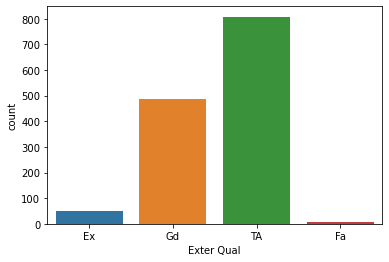

In [11]:
sns.countplot( df['Exter Qual'], data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kitchen Qual', ylabel='count'>

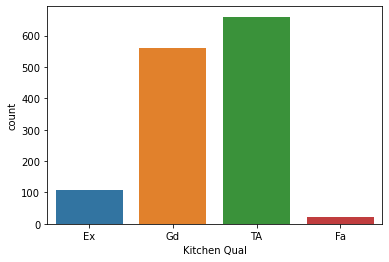

In [12]:
sns.countplot(df['Kitchen Qual'],data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overall Qual', ylabel='count'>

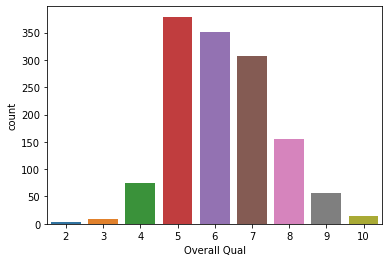

In [13]:
sns.countplot(df['Overall Qual'],data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bsmt Qual', ylabel='count'>

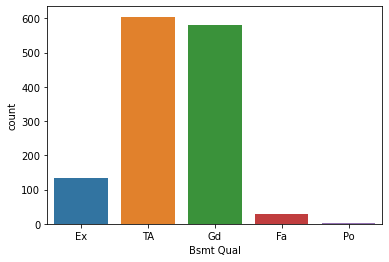

In [14]:
sns.countplot(df['Bsmt Qual'],data = df) # po 가 하나 더 있네...

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Cars', ylabel='count'>

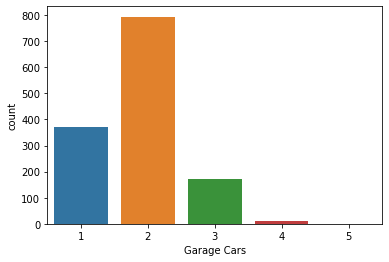

In [15]:
sns.countplot(df['Garage Cars'],data = df) # 2대가 가장 많다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Full Bath', ylabel='count'>

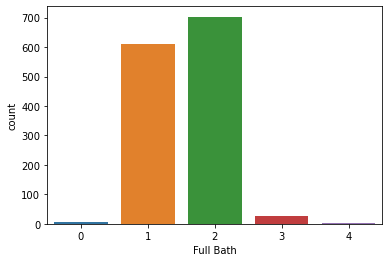

In [16]:
sns.countplot(df['Full Bath'],data = df) # 화장실 2개가 많다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Garage Yr Blt', ylabel='count'>

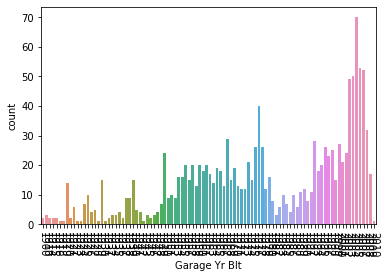

In [17]:
plt.xticks(rotation = -90)
plt.rcParams['figure.figsize'] = [20, 5]
sns.countplot(df['Garage Yr Blt'],data = df) #Year Built,Year Remod/Add ,Garage Yr Blt
#  year bult 규칙적이게 발생 remov/add 2004~2007 1990 garage yr blt 규칙적인데 year blt 보다는 아니다. 

<AxesSubplot:xlabel='Full Bath', ylabel='target'>

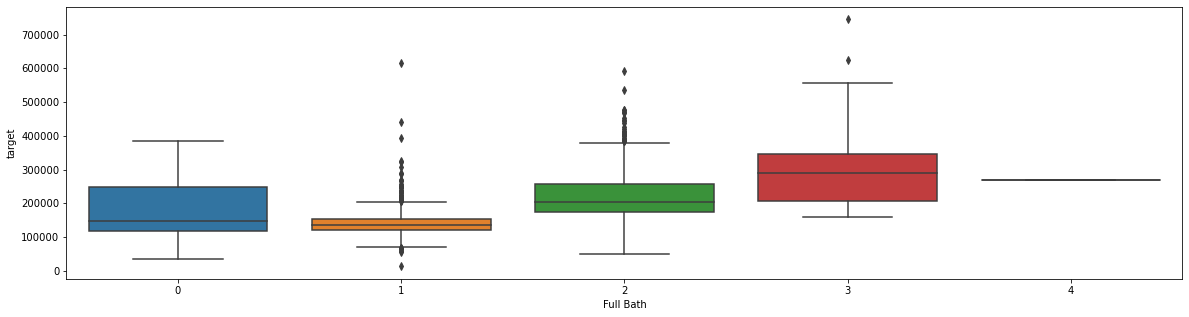

In [19]:
sns.boxplot(x = 'Full Bath', y = 'target',data = df)

<AxesSubplot:xlabel='Bsmt Qual', ylabel='target'>

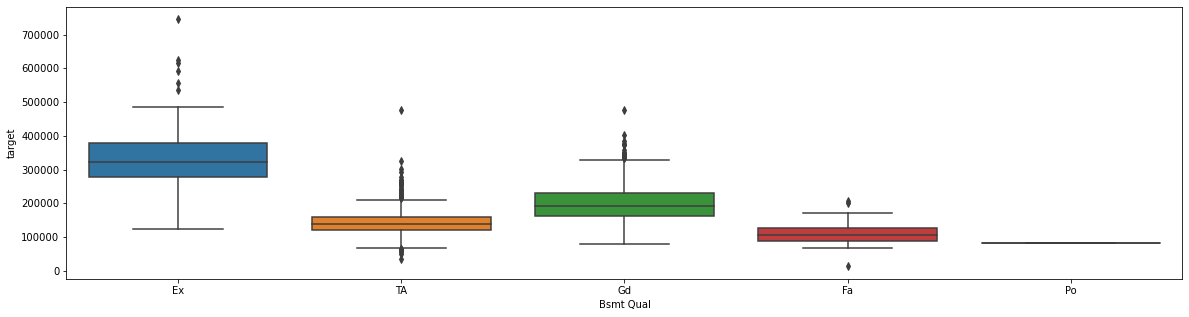

In [20]:
sns.boxplot(x = 'Bsmt Qual', y = 'target',data = df)  # bstm 만 빼고 ex > gd >ta 순으로 좋다. 지하실은 앞에 것보단 적게 영향력을 끼침

<AxesSubplot:xlabel='Year Built', ylabel='target'>

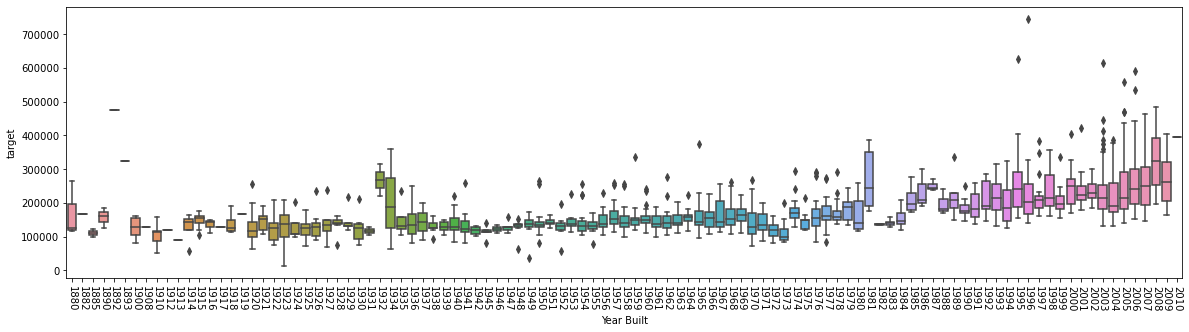

In [21]:
plt.xticks(rotation = -90)
sns.boxplot(x = 'Year Built', y = 'target',data = df)

<AxesSubplot:xlabel='target', ylabel='Density'>

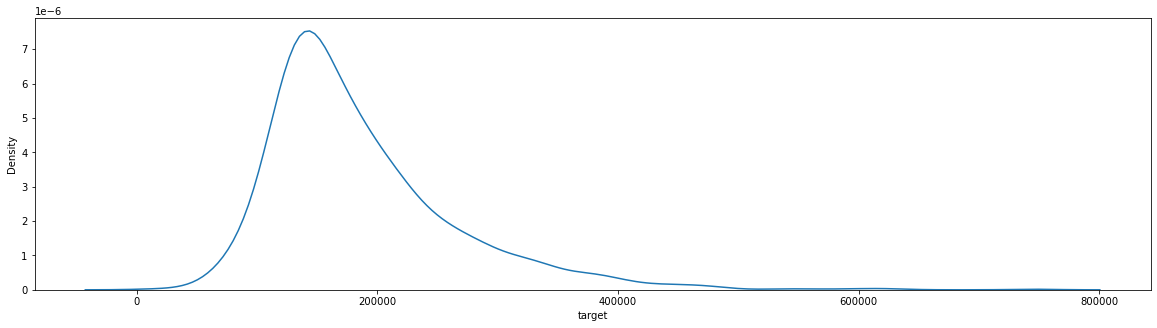

In [25]:
sns.kdeplot(df['target'])  # 너무 한쪽에 편중이 되어있다.

In [26]:
sns.kdeplot(log(df['target']))

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_19688/3424595194.py, line 1)

In [ ]:
df1_corr = df1.corr()

<AxesSubplot:>

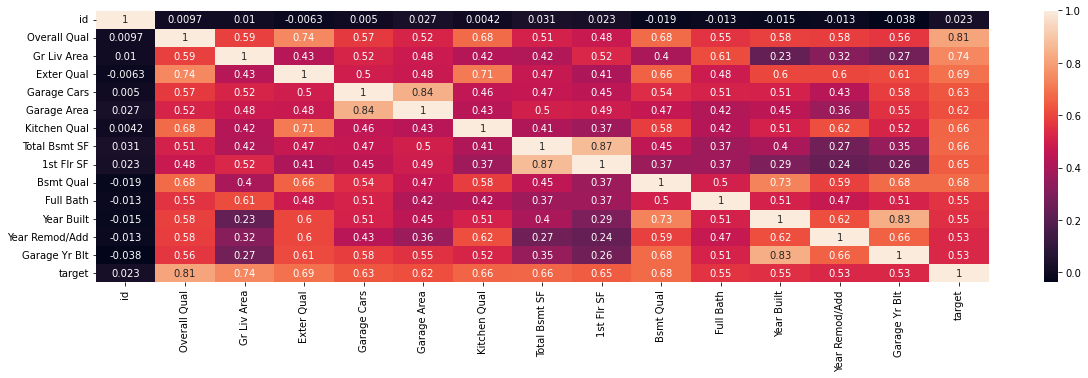

In [16]:
sns.heatmap(df1_corr,annot =True) # Garcar - Gar are total Bsmtsf - 1st fir sf yearbult-yearrm garyrblt yearbult  

In [13]:
import statsmodels.api  as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 회귀분석 , 랜덤포래스트 

In [12]:
df1 = df.copy()

In [14]:
df1 = df1.apply(lambda x : x.replace('Ex',5))
df1 = df1.apply(lambda x : x.replace('Gd',4))
df1 = df1.apply(lambda x : x.replace('TA',3))
df1 = df1.apply(lambda x : x.replace('Fa',2))
df1 = df1.apply(lambda x : x.replace('Po',1)) # ex,Gd,Ta

In [9]:
df2 = df1.copy()

# train-test

In [10]:
X = df1.drop('target',axis =1)
Y = np.log(df2['target'])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 ,shuffle = True)

# 회귀분석 ( Linear,Ridge,Lasso)

In [12]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [13]:
lr.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso()

In [14]:
lr_rsquare = lr.score(x_test,y_test)
ridge_rsquare = ridge.score(x_test,y_test)
lasso_rsquare = lasso.score(x_test,y_test)
print(lr_rsquare)
print(ridge_rsquare)
print(lasso_rsquare)

0.8325877881820338
0.8326833257933446
0.7618840199919599


In [23]:
import numpy as np

def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
y_lr_pred = lr.predict(x_test)

In [26]:
print(NMAE(y_test,y_lr_pred))
print(NMAE(y_test,ridge.predict(x_test)))

0.008889679116107926
0.008887109963440306


# RandomForest

In [27]:
rf = RandomForestRegressor(n_estimators =1000,
                          criterion = 'mse')

In [127]:
rf.fit(x_train,y_train)

C:\Users\kio02\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=1000)

In [128]:
rf_train_pred = rf.predict(x_train)
rt_test_pred = rf.predict(x_test)
print('훈련:%.3f,테스트:%.3f' %(r2_score(y_train,rf_train_pred),r2_score(y_test,rt_test_pred)))
print(mean_squared_error(y_train,rf_train_pred))
print(mean_squared_error(y_test,rt_test_pred))

훈련:0.978,테스트:0.872
0.003326400801028647
0.015577049565867725


In [1]:
plt.scatter(y_test.index,rt_test_pred)
plt.scatter(y_test.index,y_test,color = 'red')
plt.legend()
plt.show() # 그림을 그려서 얼마나 예측하였는지 확인

NameError: name 'plt' is not defined

In [130]:
NMAE(y_test,rt_test_pred)

0.007694089226615172

## randomforest 의 NMAE 값이 가장 작다

In [53]:
test_df = pd.read_csv('E:/data/housing/test.csv')

In [54]:
test_df

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


In [55]:
test_df = test_df.apply(lambda x : x.replace('Ex',5))
test_df= test_df.apply(lambda x : x.replace('Gd',4))
test_df= test_df.apply(lambda x : x.replace('TA',3))
test_df= test_df.apply(lambda x : x.replace('Fa',2))
test_df= test_df.apply(lambda x : x.replace('Po',1))

In [56]:
testdf1 = test_df.copy()

In [46]:
rf.fit(X,Y)

C:\Users\kio02\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=1000)

In [57]:
ridge.fit(X,Y)

Ridge()

In [58]:
ridge_predict = ridge.predict(testdf1)

In [59]:
final_rd = np.exp(ridge_predict)

In [61]:
testdf1['target'] = final_rd

In [29]:
test_predict = rf.predict(test_df)

In [30]:
final_predict = np.exp(test_predict) # 예측한 값을 제곱하여 원래 값으로 돌려준다.

In [31]:
test_df['target'] = final_predict

In [63]:
submission1 = testdf1[['id','target']]

In [32]:
submission = test_df[['id','target']]

In [33]:
submission.head()

,id,target
0,1,330505.475753
1,2,129527.549083
2,3,178869.160224
3,4,223897.787829
4,5,133753.547681


In [35]:
submission.to_csv('E:/data/housing/submission.csv',index = False)

In [64]:
submission1.to_csv('E:/data/housing/submission1.csv',index = False)